In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# 3. Работа с Pandas

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [120]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [121]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**3.1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [186]:
# ваш код

# Создадим таблицу Год (для каждого дня)/Температура:
res = pd.DataFrame(data = {"Year": df['Day'].dt.year, "t": df['t']})
print( "1. Таблица Год/Температура: \n", res.head() )


# Сгруппируем 
res = res.groupby(['Year']).mean()
print("\n2. Сгруппированные по году данные: \n", res)


print('\n', '*' * 30, 'ОТВЕТ', '*' * 30)

# Самый холодный год
res_min = res.loc[res.t == res.t.min()]
print("Самый холодный год:\n", res_min)


# Самый тёплый год
res_max = res.loc[res.t == res.t.max()]
print("\nСамый тёплый год:\n", res_max)

1. Таблица Год/Температура: 
    Year   t
0  2008   0
1  2008  -5
2  2008 -11
3  2008 -11
4  2008 -12

2. Сгруппированные по году данные: 
              t
Year          
2008  8.545205
2009  7.610959
2010  7.117808
2011  8.337912
2012  6.980822
2013  8.728767
2014  8.931507
2015  9.079452
2016  7.907104

 ****************************** Ответ ******************************
Самый холодный год:
              t
Year          
2012  6.980822

Самый тёплый год:
              t
Year          
2015  9.079452


**3.2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [188]:
# ваш код
# Выделяем годы и месяцы в отдельные колонки и выбираем лишь январи
res = pd.DataFrame(data = {"Year": df['Day'].dt.year, "t": df['t'] } ).loc[ df['Day'].dt.month == 1 ]

print("1. Таблица Год/Температура (для каждого январского дня): \n", res.head())
assert len(res)/31 == 9, "Неверное количество записей"


# Выделим строки с положительной температурой и сгруппируем
res = res[res.t >= 0].groupby(['Year']).count()
print("\n2. Данные Год/Количество тёплых дней в январе: \n", res)


print('\n', '*' * 30, 'ОТВЕТ', '*' * 30)
print("Год с самым большим количеством тёплых дней в январе:\n", res.loc[res.t == res.t.max()])



1. Таблица Год/Температура (для каждого январского дня): 
    Year   t
0  2008   0
1  2008  -5
2  2008 -11
3  2008 -11
4  2008 -12

2. Данные Год/Количество тёплых дней в январе: 
        t
Year    
2008  19
2009  11
2011   5
2012   6
2013   5
2014   8
2015  14
2016   5

 ****************************** ОТВЕТ ******************************
Год с самым большим количеством тёплых дней в январе:
        t
Year    
2008  19


**3.3.** В каком году было самое холодное лето (по средней температуре)

In [189]:
# ваш код
# Выделяем годы и месяцы в отдельные колонки и выбираем лишь июнь, июль и август
res = pd.DataFrame(data = {"Year": df['Day'].dt.year, 
                           "t": df['t'] } ).loc[ (df['Day'].dt.month >= 6) & (df['Day'].dt.month <= 8) ]
print("1. Таблица Год/Температура (для каждого летнего дня): \n", res.head())


# Сгруппируем
res = res.groupby(['Year']).mean()
print("\n2. Данные Год/Средняя температура летних дней: \n", res)


print('\n', '*' * 30, 'ОТВЕТ', '*' * 30)
print("Год с самым холодным летом:\n", res.loc[res.t == res.t.min()])

1. Таблица Год/Температура (для каждого летнего дня): 
      Year   t
151  2008  15
152  2008  17
153  2008  10
154  2008  16
155  2008  20

2. Данные Год/Средняя температура летних дней: 
               t
Year           
2008  18.119565
2009  18.728261
2010  22.119565
2011  21.318681
2012  19.086957
2013  21.543478
2014  20.706522
2015  19.032609
2016  19.326087

 ****************************** ОТВЕТ ******************************
Год с самым холодным летом:
               t
Year           
2008  18.119565


**3.4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [190]:
# ваш код
# Найдём день, для которого разница со следующим равна максимальной (15)
res =df[df['t'] - df['t'].shift(-1) == max(abs(df['t'] - df['t'].shift(-1))) ]
ind = res.index[0]

print('\n', '*' * 30, 'ОТВЕТ', '*' * 30)
print("День с самым большим перепадом: \n", res)

assert abs(df.iloc[ind].t - df.iloc[ind+1].t) == max( abs( df['t'] - df['t'].shift(-1) ) ), "Ответ неверный"


 ****************************** ОТВЕТ ******************************
День с самым большим перепадом: 
             Day   t
2334 2014-05-26  22


**3.5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

1. Таблица Год/Температура: 
    Year   t
0  2008   0
1  2008  -5
2  2008 -11
3  2008 -11
4  2008 -12

2. Данные Год/Средняя температура: 
              t
Year          
2008  8.545205
2009  7.610959
2010  7.117808
2011  8.337912
2012  6.980822
2013  8.728767
2014  8.931507
2015  9.079452
2016  7.907104

 ****************************** ОТВЕТ ******************************


<AxesSubplot:xlabel='Year'>

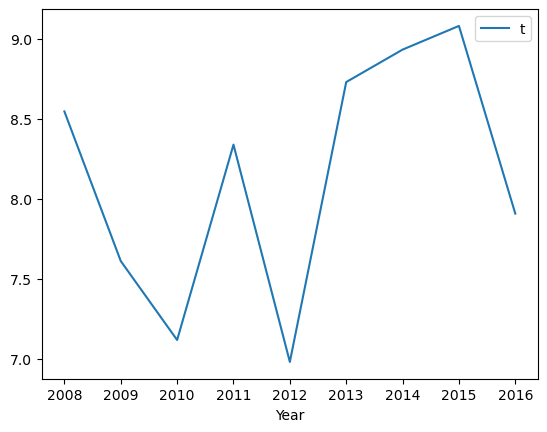

In [191]:
# ваш код
# Таблица Год/Температура
res = pd.DataFrame(data = {"Year": df['Day'].dt.year, 
                           "t": df['t'] } )
print("1. Таблица Год/Температура: \n", res.head())


# Сгруппируем
res = res.groupby(['Year']).mean()
print("\n2. Данные Год/Средняя температура: \n", res)

print('\n', '*' * 30, 'ОТВЕТ', '*' * 30)
#График
res.plot()